In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
import matplotlib as mpl

warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2


In [2]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
results_dir = os.path.join(output_dir, 'sfp_model', 'results_2D')
fig_dir = os.path.join(output_dir, 'figures')
lr = 0.0005
max_epoch = 30000
dset='nsdsyn'
roi_list = ['V1','V2','V3']
vsc='pRFsize'
nsd_subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]
broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
broderick_subj_list = [utils.sub_number_to_string(i, 'broderick') for i in broderick_sn_list]
ARGS_2D = ['sub','lr','eph','roi','dset']
roi_pal = [sns.color_palette('dark', 10)[:][k] for k in  [3,2,0]]
roi_pal.insert(0, (0.3,0.3,0.3))
stim_classes=['annulus', 'reverse spiral', 'pinwheel', 'forward spiral']

In [3]:
pt_file_list = []
dset = 'nsdsyn'
for subj, roi in itertools.product(nsd_subj_list, ['V1', 'V2', 'V3']):
    file_name = os.path.join(output_dir, 'sfp_model', 'results_2D', dset,
                             f'model-params_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(file_name)
nsd_params = model.load_all_models(pt_file_list, *ARGS_2D)

nsd_precision_s = pd.read_csv(
    os.path.join(output_dir, 'dataframes', dset, 'precision', f'precision-s_dset-{dset}_vs-pRFsize.csv'))
nsd_df = pd.merge(nsd_params, nsd_precision_s[['sub', 'vroinames', 'precision']], on=['sub', 'vroinames'])


In [53]:

new_df = vis2D.calculate_within_subject_error_for_V123(nsd_df, 'sigma', subject='sub', roi='vroinames')
new_df = pd.merge(new_df, nsd_df[['sub','precision']], on='sub')

<AxesSubplot:ylabel='Parameter difference'>

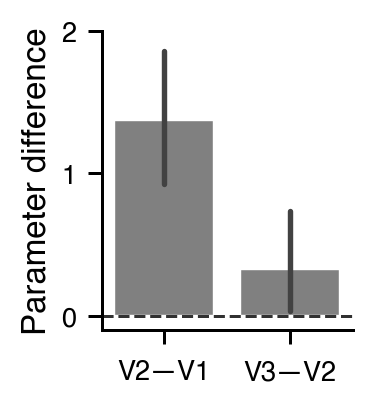

In [54]:
vis2D.plot_within_subject_error_for_V123(new_df, 'sigma', 'precision', 
                                         save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'nsdsyn','param-sigma_difference.svg'))

# Within-subject error graph

<AxesSubplot:ylabel='Parameter difference'>

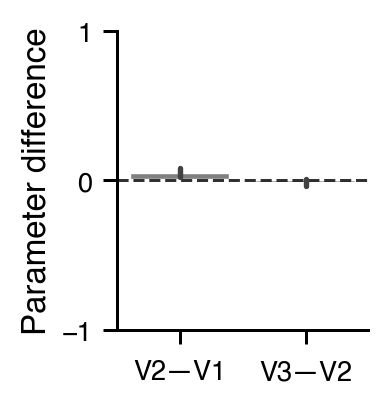

In [57]:
new_df = vis2D.calculate_within_subject_error_for_V123(nsd_df, 'slope', subject='sub', roi='vroinames')
new_df = pd.merge(new_df, nsd_df[['sub','precision']], on='sub')
vis2D.plot_within_subject_error_for_V123(new_df, 'slope', 'precision', 
                                         save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'nsdsyn','param-slope_difference.svg'))


<AxesSubplot:ylabel='Parameter difference'>

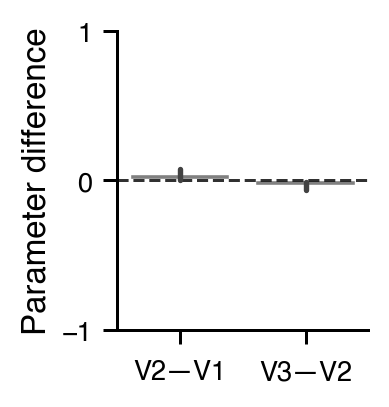

In [58]:
new_df = vis2D.calculate_within_subject_error_for_V123(nsd_df, 'intercept', subject='sub', roi='vroinames')
new_df = pd.merge(new_df, nsd_df[['sub','precision']], on='sub')
vis2D.plot_within_subject_error_for_V123(new_df, 'intercept', 'precision', 
                                         save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'nsdsyn','param-intercept_difference.svg'))